In [1]:
# 1/n Portfolio, Daily rebalancing
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import cvxpy as cvx

In [2]:
prices = pd.read_csv("smi2017_adjclose.txt", index_col="Date", parse_dates=True).sort_index()

In [3]:
returns = prices.pct_change()

In [4]:
print(100*16*returns.std().sort_values())

SCMN.VX    10.543951
SGSN.VX    12.317882
ZURN.VX    12.398731
NESN.VX    13.671755
GIVN.VX    14.390547
GEBN.VX    14.891311
NOVN.VX    14.980927
SREN.VX    15.119639
SLHN.VX    15.228060
ABBN.VX    15.654343
ROG.VX     15.949457
SIK.VX     16.021866
ADEN.VX    17.386070
BAER.VX    18.833565
LHN.VX     20.037389
CFR.VX     20.570847
LONN.VX    21.256685
UHR.VX     22.075680
CSGN.VX    23.987120
UBSG.VX    57.198538
dtype: float64


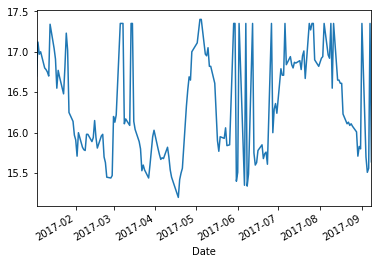

In [5]:
# Severe problems with data quality here...
prices["UBSG.VX"].plot()
plt.show()

In [6]:
matrix = returns.fillna(0.0)

In [7]:
matrix

,ABBN.VX,ADEN.VX,BAER.VX,CFR.VX,CSGN.VX,GEBN.VX,GIVN.VX,LHN.VX,LONN.VX,NESN.VX,NOVN.VX,ROG.VX,SCMN.VX,SGSN.VX,SIK.VX,SLHN.VX,SREN.VX,UBSG.VX,UHR.VX,ZURN.VX
Date,,,,,,,,,,,,,,,,,,,,
2017-01-03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2017-01-04,0.001381,0.028127,0.009859,-0.011152,0.034745,-0.007319,0.007531,0.003742,0.032216,0.008253,-0.009327,0.008898,0.015919,-0.001433,-0.004705,0.006745,0.004613,0.025150,-0.005395,0.003846
2017-01-05,0.000460,0.000000,0.006024,-0.005263,-0.019902,0.009339,0.000534,0.005592,0.005481,0.010914,0.007398,0.013020,0.015887,0.006217,-0.001439,-0.001675,-0.009694,-0.008762,-0.008934,-0.004528
2017-01-06,0.007809,-0.000720,-0.011770,0.018896,0.008253,-0.000974,-0.002668,0.003707,0.004357,0.006748,-0.002003,0.000415,0.000643,-0.001426,-0.014203,0.001007,-0.002576,0.001768,0.005795,-0.000700
2017-01-09,-0.004102,-0.000721,-0.013790,0.011869,0.001259,-0.001462,-0.002140,-0.009234,-0.003800,0.001340,0.003345,0.002487,-0.001927,0.006188,0.005012,-0.004023,-0.007748,-0.011765,0.027849,-0.003501
2017-01-10,0.012357,0.007210,0.005508,0.039590,-0.001257,0.001220,-0.010724,0.004660,0.003973,-0.005355,0.005333,0.006201,-0.009224,-0.007569,-0.002493,-0.009424,-0.002082,-0.001190,0.028340,-0.001757
2017-01-11,0.022152,0.003579,-0.003161,0.000000,0.008811,0.006826,0.007588,-0.012059,0.010683,0.000000,-0.012599,-0.010682,-0.001299,0.008580,0.004791,0.003058,0.003130,-0.001788,0.004543,0.000352
2017-01-12,-0.010615,0.006419,-0.002748,0.086037,-0.023707,-0.000726,-0.004303,-0.004695,-0.010194,0.002019,-0.022162,-0.020349,-0.004986,0.002363,-0.005182,-0.003049,-0.008840,-0.002985,0.054567,-0.013723
2017-01-13,0.013411,0.000709,0.020348,0.005195,0.030031,0.003150,-0.001621,0.023585,0.003798,0.000672,0.002747,0.013141,0.004793,0.011787,0.006668,0.004417,0.011542,0.038323,0.010863,0.012130


In [8]:
# Define an initial position
w0 = 0.05*np.ones(20)

In [9]:
w0

array([0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05,
       0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05])

In [11]:
def elasticNet(matrix, w0, lamb_balance=0, lamb_trades=0):
    def __objective():
        return cvx.Minimize(cvx.norm(matrix.values*w,2) + 
                            lamb_balance*cvx.norm(w,2) + 
                            lamb_trades*cvx.norm(w-w0,1))

    w = cvx.Variable(matrix.shape[1])
    cvx.Problem(__objective(), [0 <= w, cvx.sum(w) == 1]).solve()
    return 100*pd.Series(index=matrix.keys(), data=w.value)

In [12]:
elasticNet(matrix, w0, lamb_balance=0.0, lamb_trades=0.03)

ABBN.VX     5.000000
ADEN.VX     5.000000
BAER.VX     5.000000
CFR.VX      5.000000
CSGN.VX     2.556734
GEBN.VX     5.000000
GIVN.VX     5.000000
LHN.VX      5.000000
LONN.VX     5.000000
NESN.VX     5.000000
NOVN.VX     5.000000
ROG.VX      5.000000
SCMN.VX    11.742600
SGSN.VX     5.000000
SIK.VX      5.000000
SLHN.VX     5.000000
SREN.VX     5.000000
UBSG.VX     0.700667
UHR.VX      5.000000
ZURN.VX     5.000000
dtype: float64

In [13]:
def pretty(weights):
    pd.options.display.float_format = '{:,.2f}%'.format
    smi = pd.read_csv("smi.txt", index_col="Ticker", squeeze=True)
    g = weights.copy()
    g.index = [smi[x] for x in g.index]
    return g

In [14]:
pretty(elasticNet(matrix, w0, lamb_balance=0.0, lamb_trades=0))

ABB Ltd                              0.00%
Adecco Group AG                      3.03%
Julius Baer Group Ltd.               0.00%
Compagnie Financière Richemont SA    3.66%
Credit Suisse Group AG               0.00%
Geberit AG                           0.00%
Givaudan SA                         12.55%
LafargeHolcim Ltd                    0.00%
Lonza Group Ltd                      0.00%
Nestlé S.A.                          5.92%
Novartis AG                          3.68%
Roche Holding AG                     2.17%
Swisscom AG                         34.56%
SGS SA                               8.03%
Sika AG                             10.24%
Swiss Life Holding AG                0.00%
Swiss Re Ltd                         1.20%
UBS Group AG                         0.39%
The Swatch Group AG                  0.00%
Zurich Insurance Group AG           14.58%
dtype: float64

In [15]:
pretty(elasticNet(matrix, w0, lamb_balance=0.4, lamb_trades=0))

ABB Ltd                             4.69%
Adecco Group AG                     4.86%
Julius Baer Group Ltd.              4.32%
Compagnie Financière Richemont SA   4.64%
Credit Suisse Group AG              3.30%
Geberit AG                          5.35%
Givaudan SA                         6.64%
LafargeHolcim Ltd                   3.99%
Lonza Group Ltd                     3.75%
Nestlé S.A.                         6.46%
Novartis AG                         5.78%
Roche Holding AG                    5.53%
Swisscom AG                         7.00%
SGS SA                              6.25%
Sika AG                             6.01%
Swiss Life Holding AG               4.79%
Swiss Re Ltd                        5.41%
UBS Group AG                        1.83%
The Swatch Group AG                 3.59%
Zurich Insurance Group AG           5.80%
dtype: float64

In [16]:
pretty(elasticNet(matrix, w0, lamb_balance=0.0, lamb_trades=0.03))

ABB Ltd                              5.00%
Adecco Group AG                      5.00%
Julius Baer Group Ltd.               5.00%
Compagnie Financière Richemont SA    5.00%
Credit Suisse Group AG               2.56%
Geberit AG                           5.00%
Givaudan SA                          5.00%
LafargeHolcim Ltd                    5.00%
Lonza Group Ltd                      5.00%
Nestlé S.A.                          5.00%
Novartis AG                          5.00%
Roche Holding AG                     5.00%
Swisscom AG                         11.74%
SGS SA                               5.00%
Sika AG                              5.00%
Swiss Life Holding AG                5.00%
Swiss Re Ltd                         5.00%
UBS Group AG                         0.70%
The Swatch Group AG                  5.00%
Zurich Insurance Group AG            5.00%
dtype: float64

In [17]:
pretty(elasticNet(matrix, w0, lamb_balance=0.4, lamb_trades=0.03))

ABB Ltd                             5.00%
Adecco Group AG                     5.00%
Julius Baer Group Ltd.              5.00%
Compagnie Financière Richemont SA   5.00%
Credit Suisse Group AG              5.00%
Geberit AG                          5.00%
Givaudan SA                         5.63%
LafargeHolcim Ltd                   5.00%
Lonza Group Ltd                     5.00%
Nestlé S.A.                         5.47%
Novartis AG                         5.00%
Roche Holding AG                    5.00%
Swisscom AG                         5.94%
SGS SA                              5.23%
Sika AG                             5.00%
Swiss Life Holding AG               5.00%
Swiss Re Ltd                        5.00%
UBS Group AG                        2.73%
The Swatch Group AG                 5.00%
Zurich Insurance Group AG           5.00%
dtype: float64

In [18]:
import numpy as np
import cvxpy as cvx
import pandas as pd


def minimize(objective, constraints=None):
    return cvx.Problem(cvx.Minimize(objective), constraints).solve()


def maximize(objective, constraints=None):
    return cvx.Problem(cvx.Maximize(objective), constraints).solve()


def std(vector):
    # we assume here that the vector is centered
    return cvx.norm(vector, 2)/np.sqrt(vector.size-1)


def elasticNet(matrix, w0, lamb_balance=0, lamb_trades=0):
    w = cvx.Variable(matrix.shape[1])
    objective = cvx.norm(matrix.values*w,2) + lamb_balance*cvx.norm(w,2) + lamb_trades*cvx.norm(w-w0,1)
    minimize(objective=objective, constraints=[0 <= w, cvx.sum(w) == 1])    
    return pd.Series(index=matrix.keys(), data=w.value)

In [20]:
pretty(100*elasticNet(matrix,w0, lamb_balance=0.4, lamb_trades=0.03))

ABB Ltd                             5.00%
Adecco Group AG                     5.00%
Julius Baer Group Ltd.              5.00%
Compagnie Financière Richemont SA   5.00%
Credit Suisse Group AG              5.00%
Geberit AG                          5.00%
Givaudan SA                         5.63%
LafargeHolcim Ltd                   5.00%
Lonza Group Ltd                     5.00%
Nestlé S.A.                         5.47%
Novartis AG                         5.00%
Roche Holding AG                    5.00%
Swisscom AG                         5.94%
SGS SA                              5.23%
Sika AG                             5.00%
Swiss Life Holding AG               5.00%
Swiss Re Ltd                        5.00%
UBS Group AG                        2.73%
The Swatch Group AG                 5.00%
Zurich Insurance Group AG           5.00%
dtype: float64